In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Students Flipping Fair Coins Conclude Coin is Unfair!

Suppose there are 2000 students. Each student:

- is given a fair coin by the instructor but they are not told that it is a fair coin
- collects data by flipping the coin **100 times** and counts the number of times it lands *Heads*
- runs a **hypothesis test**:
    - **Null Hypothesis**: They were givne a fair coin and the number of heads observed see is due to chance.
    - **Alternative Hypothesis**: The coin is biased and so the number of heads they observed is not due to chance alone.
    - **Test Statistic**: abs(num_heads - 50)
- runs 1000 simulations of flipping a fair coin 100 times (using Python)
- reports their p-value and rejects the null hypothesis if their p-value is less than 0.05

We know that we gave all of them fair coints. How often will they incorrectly reject the null hypothesis?

Could you write code to simulate the process of one student running this hypothesis test?

## Simulating the Simulation
In the following we will use simulation to simulate the students running a simulation. Very meta!

1. simulate one coin flip `np.random.choice()`
2. simulate 100 coin flips
3. calculate the observed test statistic
4. simulate one the statistic under the null hypothesis
5. simulate 1000x from null hypothesis
6. calculate p-value

In [2]:
# One coin flip
np.random.choice(["H", "T"])

'H'

In [3]:
# Student Collects Data by actually flipping the coin (we simualte here)
# its fair coin but we didn't tell the studnet

num_coin_flips = 100
obs_flips = np.random.choice(["H", "T"], num_coin_flips) 
obs_flips

array(['H', 'T', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'H', 'H',
       'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'T', 'T',
       'H', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'T',
       'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T',
       'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'T',
       'H', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H',
       'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'T', 'H', 'T',
       'H', 'H', 'T', 'T', 'T', 'T', 'H', 'H', 'T'],
      dtype='<U1')

In [4]:
# Calculate Test statistics

num_heads = sum(obs_flips == "H")
print(num_heads)
np.abs(num_heads - num_coin_flips/2) # find absolute value/distance from 50

45


5.0

In [5]:
# Function to simulate coin flips and calculate statistic

def simulate_one_statistic():
    sim_flips = np.random.choice(["H", "T"], num_coin_flips)
    num_heads = sum(sim_flips == "H")
    sim_statistic = np.abs(num_heads - num_coin_flips/2)    
    return sim_statistic

simulate_one_statistic()

7.0

In [6]:
# calculate p-value

obs_statistic = simulate_one_statistic()

# Hypothesis Test: Simulate from Null hypothesis
num_simulations = 1000
simulated_statistics = make_array()
for i in np.arange(num_simulations):  # Simulate 2000 trials  
    one_statistic = simulate_one_statistic()
    simulated_statistics = np.append(simulated_statistics, one_statistic)

# Compute the P Value
p_value = sum(simulated_statistics >= obs_statistic) / num_simulations
p_value

0.20000000000000001

In [7]:
def simulate_one_hypothesis_test():    
    obs_statistic = simulate_one_statistic()
    
    # Hypothesis Test: Simulate from Null hypothesis
    simulated_statistics = make_array()
    for i in np.arange(num_simulations):  # Simulate 2000 trials  
        one_statistic = simulate_one_statistic()
        simulated_statistics = np.append(simulated_statistics, one_statistic)
        
    # Compute the P Value
    p_value = sum(simulated_statistics >= obs_statistic) / num_simulations    
    return p_value


simulate_one_hypothesis_test()

0.20899999999999999

### Simulate all students running the experiment

In [8]:
n_students = 2000
all_students = make_array()

for i in np.arange(n_students):
    all_students = np.append(all_students, simulate_one_hypothesis_test())

## Plot the p-values

You would seldom do this in practice, but here we can visualize the distribution of p-values that all the students in the class get. Some will conclude that they have an unfair coin.



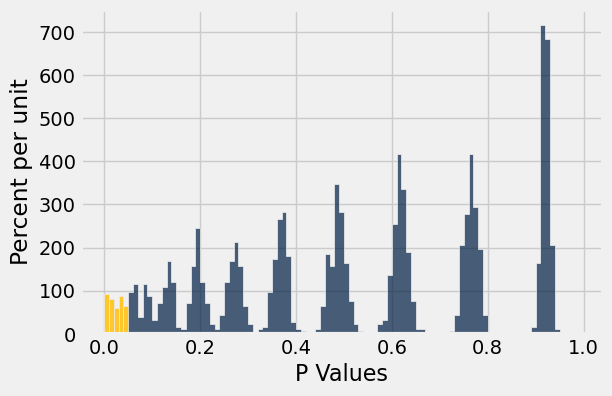

In [9]:
tbl = Table().with_column("P Values", all_students)
tbl.hist("P Values", bins=np.arange(0, 1, 0.01), right_end=0.05)

## Number of students who would reject the null

In [11]:
print(sum(all_students < 0.05), " would falsely reject the null hypothesis.")

71  would falsely reject the null hypothesis.


In [12]:
.05 * 2000

100.0

---

# Super Soda Co and the Case of Bad Taste
Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival. The boss is upset! He asks:

Do fewer people prefer Super Soda, or is this just chance?

You run a hypothesis test:

Null Hypothesis: Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
Alternative Hypothesis: Fewer people in the population prefer Super Soda than its Rival.
Test Statistic: Number of people who prefer Super Soda
You pick a p-value cutoff of 0.05

In [13]:
obs_statistic = 91

In [17]:
def simulate_one_count(sample_size): # simulating under the null
    simulated_data = np.random.choice(['Super', 'Rival'], sample_size)
    simulated_statistic = np.count_nonzero(simulated_data == "Super")
    return simulated_statistic
simulate_one_count(200)

104

In [24]:
np.count_nonzero(make_array(True, False))

1

In [25]:
np.count_nonzero(make_array(1, 0))

1

In [22]:
sum(make_array(True, False)) # True = 1, False = 0

1

In [23]:
sum(make_array(1,0))

1

In [18]:
num_simulations = 10_000
counts = make_array()
for i in np.arange(num_simulations):
    counts = np.append(counts, simulate_one_count(200))

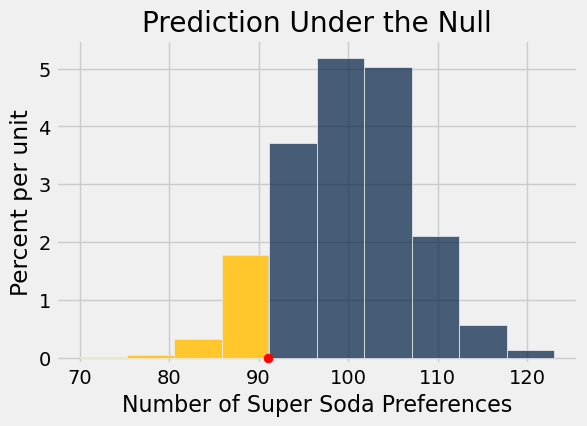

In [19]:
trials = Table().with_column('Number of Super Soda Preferences', counts)
trials.hist(right_end=91)
plots.ylim(-0.001, 0.055)
plots.scatter(91, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null');

In [20]:
p_value = np.count_nonzero(counts <= 91)/len(counts)
print("The p-value is", p_value)

The p-value is 0.1144


## Changing the number of simulations
What happens if we run a different number of simulations?

In [26]:
# Keeping the data fixed, we can re-run the test with a new simulation under the null
def simulate_null(num_simulations, sample_size):
    counts = make_array()
    for i in np.arange(num_simulations):
        counts = np.append(counts, simulate_one_count(sample_size))
    return counts

In [27]:
# Keeping the data fixed, we can re-run the test with a new simulation under the null
def run_test(num_simulations, sample_size, obs_statistic):
    counts = simulate_null(num_simulations, sample_size)
    # compute the p value
    p_value = np.count_nonzero(counts <= obs_statistic)/len(counts)
    return p_value

### Simulating the Simulation (Again)
We can again run multiple simulations of our simulation.

In [28]:
# Let's repeat that 100 times for each number of simulations
tests = Table(['simulations', 'p-value for 91'])
for k in np.arange(100): # will run the simulation 100 times
    for num_sims in [100, 1000, 10000]: 
        p_value = run_test(num_sims, 200, 91)
        tests = tests.with_row([num_sims, p_value])
tests.show(3)

simulations,p-value for 91
100,0.09
1000,0.105
10000,0.1195


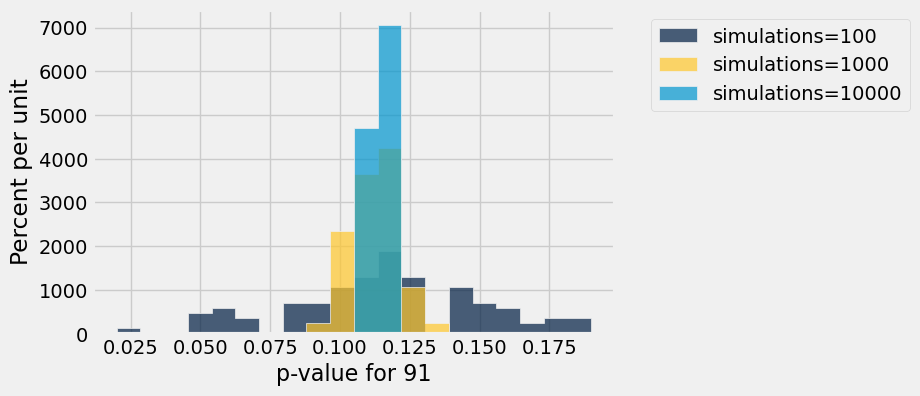

In [29]:
# For larger numbers of simulations, p-values are more consistent
tests.hist("p-value for 91", group='simulations', bins=20)

### Law of Large Number
The reason the p-values concentrate towards the true p-value is that the emprical distribution under the null is better approximates by increasing the number of simulations. More is better!

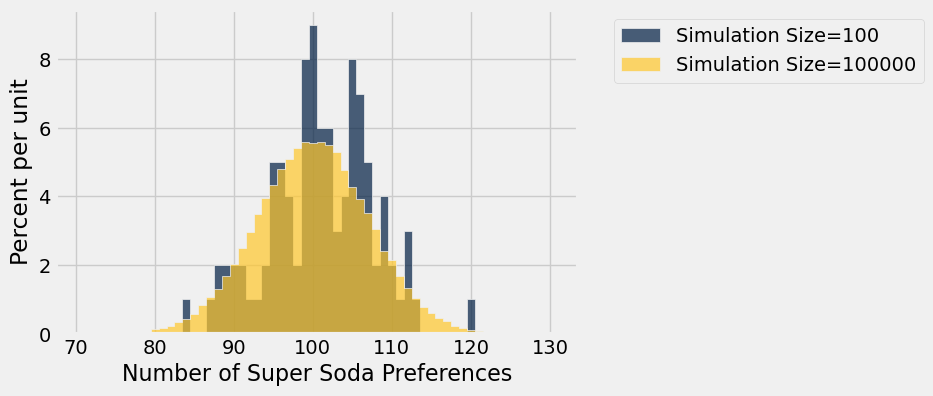

In [30]:
t1 = Table().with_columns("Number of Super Soda Preferences", simulate_null(100, 200),
                           "Simulation Size", 100)

t2 = Table().with_columns("Number of Super Soda Preferences", simulate_null(100_000, 200),
                           "Simulation Size", 100_000)

t1.append(t2).hist(group='Simulation Size', bins=np.arange(70.5, 131, 1))

## The Importance of Sample Size
Larger samples give us more information about the population and also allow us to test more subtle differences.

Suppose that the true proportion of people who prefer Super Soda is 45%

In [32]:
.45*200

90.0

In [31]:
true_proportion = 0.45
true_distribution = make_array(true_proportion, 1 - true_proportion)
true_distribution

array([ 0.45,  0.55])

Taste tests with 200 people will give varioius numbers of people who prefer Super Soda

In [33]:
help(sample_proportions)

Help on function sample_proportions in module datascience.util:

sample_proportions(sample_size, probabilities)
    Return the proportion of random draws for each outcome in a distribution.
    
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
    
        ``probabilities``: An array of probabilities that forms a distribution.
    
    Returns:
        An array with the same length as ``probability`` that sums to 1.



In [34]:
sample_size = 200
sample_proportions(sample_size, true_distribution) * sample_size

array([  93.,  107.])

In [35]:
# If you run a taste test for 200 people, what might you conclude?
def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = make_array(true_proportion, 1 - true_proportion)
    taste_test_results = sample_proportions(sample_size, true_distribution) * sample_size
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    p_value = run_test(num_simulations, sample_size, observed_stat_from_this_sample)
    return p_value

run_experiment(10000, 200, 0.45)

0.0021

Try using different values for the true_proportion and sample size. What happens to as the true proportion gets closer to 0.5? What happens if we increase the sample size.

Percent that correctly reject the null 60.0


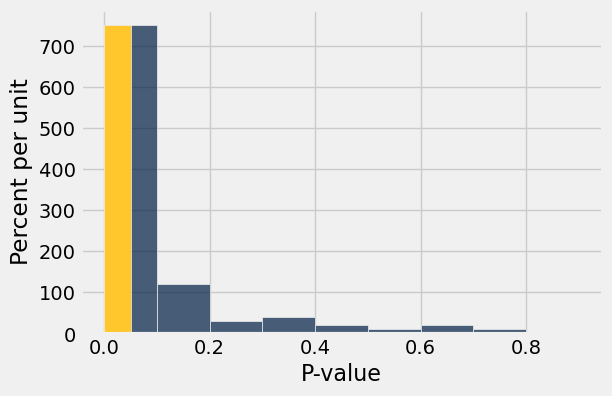

In [38]:
# Let's imagine running our taste test over and over again to see how often we reject the null
true_proportion = 0.45
sample_size = 400
p_values = make_array()
for k in np.arange(100):
    p_value = run_experiment(1000, sample_size, true_proportion)
    p_values = np.append(p_values, p_value)
Table().with_column('P-value', p_values).hist(0, right_end=0.05, bins=np.arange(0,1,0.1))
print("Percent that correctly reject the null", 100*np.mean(p_values <= 0.05))

# Example: Benford's Law

https://en.wikipedia.org/wiki/Benford%27s_law

In [39]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)

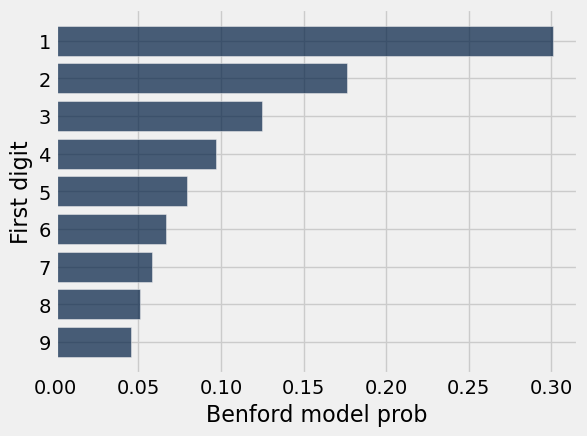

In [40]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

In [41]:
# You don't have to understand how this function works, since it uses Python features from beyond Data 8.
def first_digit(num):
    return int(str(num)[0])

In [42]:
first_digit(32)

3

In [43]:
first_digit(17719087)

1

In [44]:
# County populations from the census data
counties = Table.read_table('data/counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9).relabeled(0,'State').relabeled(1,'County').relabeled(2,'Population')
counties.show(3)

State,County,Population
Alabama,Autauga County,54684
Alabama,Baldwin County,183216
Alabama,Barbour County,27336


In [46]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(20)

State,County,Population,First digit
Alabama,Autauga County,54684,5
Alabama,Baldwin County,183216,1
Alabama,Barbour County,27336,2
Alabama,Bibb County,22879,2
Alabama,Blount County,57344,5
Alabama,Bullock County,10886,1
Alabama,Butler County,20945,2
Alabama,Calhoun County,118443,1
Alabama,Chambers County,34111,3
Alabama,Cherokee County,25968,2


In [47]:
num_counties = counties.num_rows

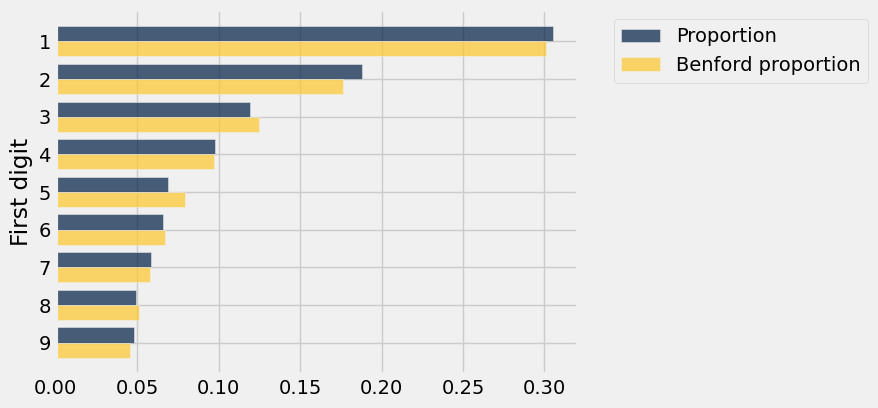

In [48]:
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

Null hypothesis:  the match up with  the bendfrd model is due to chance

Alternative hypothesis:  similarities in our counties' proportion and Benford's model are consistent 

Test statistic: ___

Fill in the blank with "Bigger" or "Smaller":

___ values of the test statistic favor the alternative

In [ ]:
observed_tvd = sum(abs(proportions - benford_model))/2
observed_tvd
print(proportions)
print(benford_model)

In [ ]:
sample_proportions(num_counties, benford_model)

In [ ]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd = sum(abs(simulated_frequencies - benford_model))/2
tvd

In [ ]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    tvd = sum(abs(simulated_frequencies - benford_model))/2
    return tvd

In [ ]:
simulated_tvds = make_array()

for i in np.arange(10000):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

In [ ]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)

In [ ]:
np.count_nonzero(simulated_tvds >= observed_tvd) / 10000

Are the data consistent with the null hypothesis?

## Example: sleep survey

In [ ]:
survey = Table.read_table('data/sleep_survey.csv')
survey

In [ ]:
def simplify(sleep_position):
    if sleep_position == 'On your left side' or sleep_position == 'On your right side':
        return 'side'
    else:
        return 'back or stomach'
    
survey = survey.with_column(
    'position',
    survey.apply(simplify, 'Sleep position')
).select('position', 'Hours of sleep')

survey

In [ ]:
survey.group('position', np.average)

Null hypothesis:  Any differences between average hours of sleep between back/stomach sleepersor side sleepers is due to chance

Alternative hypothesis:  

Back/stomach sleepers on average get more sleep than side sleepers


Test statistic:

__ Average hours of sleep for back/stomach - Average hours of sleep for side __
__ Asolute value of (Average hours of sleepfor back/stomach - Average hours of sleep for side) __



Fill in the blank with "Bigger" or "Smaller":

__ Larger __ values of the test statistic favor the alternative

In [ ]:
def compute_test_statistic(tbl):
    grouped = tbl.group('position', np.average)
    avgs = grouped.column('Hours of sleep average')
    return avgs.item(1) - avgs.item(0)

In [ ]:
obs_test_stat = compute_test_statistic(survey)
obs_test_stat

In [ ]:
random_labels = survey.sample(with_replacement=False).column('position')

In [ ]:
def simulate_under_null():
    random_labels = survey.sample(with_replacement=False).column('position')
    relabeled_tbl = survey.with_column('position', random_labels)
    return compute_test_statistic(relabeled_tbl)


In [ ]:
simulated_diffs = make_array()
for i in np.arange(1000):
    null_stat = simulate_under_null()
    simulated_diffs = np.append(simulated_diffs, null_stat)

In [ ]:
Table().with_column('Simulated difference', simulated_diffs).hist(0)

In [ ]:
obs_test_stat

In [ ]:
np.mean(simulated_diffs <= obs_test_stat)

Are the data consistent with the null hypothesis?